{"categories": [], "color": {"dominantColorForeground": "Green", "dominantColorBackground": "Black", "dominantColors": ["Green", "Black", "Grey"], "accentColor": "486C2D", "isBwImg": false, "isBWImg": false}, "description": {"tags": ["animal", "priest", "outdoor", "mammal", "monkey", "small", "sitting", "brown", "branch", "little", "standing", "black", "green", "bird", "holding", "mouth", "eating", "wooden", "perched", "dog", "playing", "laying"], "captions": [{"text": "a monkey sitting on a branch", "confidence": 0.8858850695733457}]}, "requestId": "61e0336a-4dcb-457f-b2d2-e4205dfa2a48", "metadata": {"width": 1500, "height": 1000, "format": "Jpeg"}}


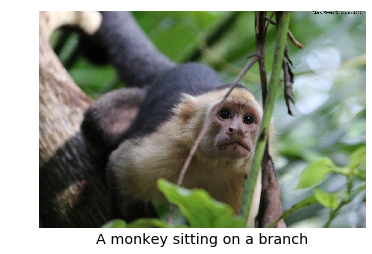

In [4]:
import requests
# If you are using a Jupyter notebook, uncomment the following line.
#%matplotlib inline
import matplotlib.pyplot as plt
import json
from PIL import Image
from io import BytesIO

# Replace <Subscription Key> with your valid subscription key.
subscription_key = "4cf29342a6fe48848fb1a3491ccb92fd"
assert subscription_key

# You must use the same region in your REST call as you used to get your
# subscription keys. For example, if you got your subscription keys from
# westus, replace "westcentralus" in the URI below with "westus".
#
# Free trial subscription keys are generated in the "westus" region.
# If you use a free trial subscription key, you shouldn't need to change
# this region.
vision_base_url = "https://westcentralus.api.cognitive.microsoft.com/vision/v1.0/"

analyze_url = vision_base_url + "analyze"

# Set image_url to the URL of an image that you want to analyze.
image_url = "https://assets2.ello.co/uploads/asset/attachment/4713699/ello-xhdpi-8bc69345.jpg"

headers = {'Ocp-Apim-Subscription-Key': subscription_key }
params  = {'visualFeatures': 'Categories,Description,Color'}
data    = {'url': image_url}
response = requests.post(analyze_url, headers=headers, params=params, json=data)
response.raise_for_status()

# The 'analysis' object contains various fields that describe the image. The most
# relevant caption for the image is obtained from the 'description' property.
analysis = response.json()
print(json.dumps(response.json()))
image_caption = analysis["description"]["captions"][0]["text"].capitalize()

# Display the image and overlay it with the caption.
image = Image.open(BytesIO(requests.get(image_url).content))
plt.imshow(image)
plt.axis("off")
_ = plt.title(image_caption, size="x-large", y=-0.1)
plt.show()